# Render Classic Tempest Vertex Objects

In [1]:
#Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
colors = {
    -1: "pink",
    0: "white",
    240: "red",
    143: "green",
    15: "yellow",
    255: "purple",
    136: "grey",
    128: "navy",
    43: "cyan"
}

def getVerticesAndConns(l, color="blue"):
    i = 0
    vertices = []
    while l[i]:
        x,y,z = l[i],l[i+1],l[i+2]
        i+=3
        conns = []
        while l[i]:
            if l[i] == -1:
                i+=1
                color = colors[l[i]]
            else:
                conns+=[(l[i],color)]
            i+=1
        vertices += [((x,y,z),conns)]
        i+=1
    return vertices

def plotObject(vertices):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.view_init(azim=135,elev=20,vertical_axis="y")
    ax.yaxis.set_inverted(True) 
    ax.xaxis.set_inverted(True) 
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    plt.rcParams['grid.color'] = "navy"

    for (x,y,z),conns in vertices:
        for conn,color in conns:
            x1,y1,z1 = vertices[conn-1][0]
            xs = np.array([[x,x1]])
            ys = np.array([[y,y1]])
            zs = np.array([[z,z1]])
            ax.plot_wireframe(xs,ys,zs,color=color)



## Render the claws

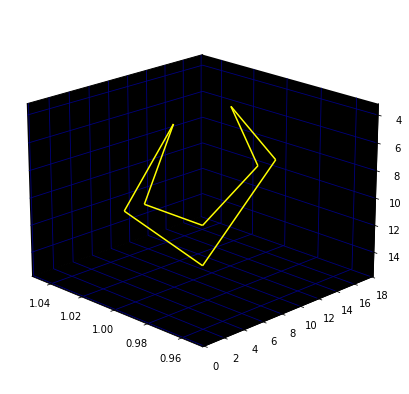

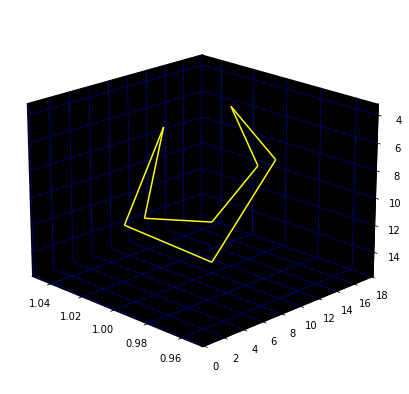

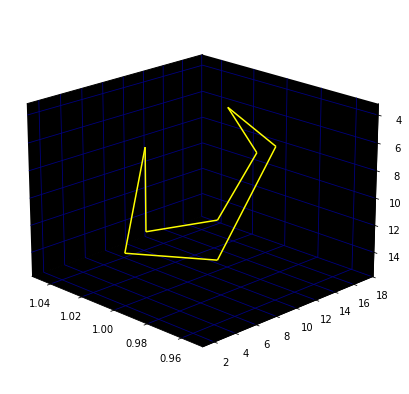

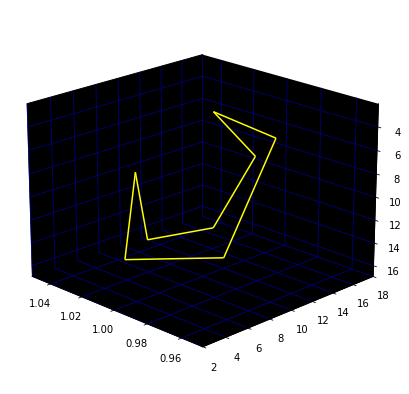

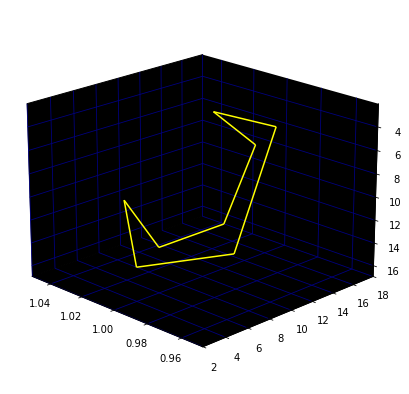

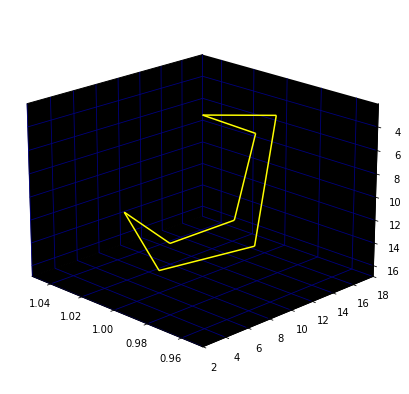

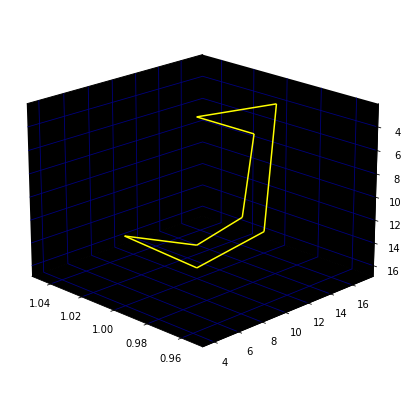

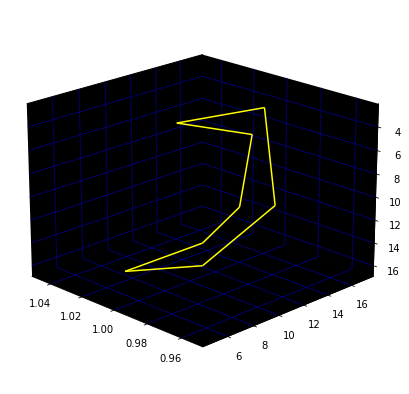

In [4]:
claws = """
claw1:  dc.b 6,4,1,2,8,0
        dc.b 3,9,1,3,0
        dc.b 9,12,1,4,0
        dc.b 15,9,1,5,0
        dc.b 12,4,1,6,0
        dc.b 17,9,1,7,0
        dc.b 9,15,1,8,0
        dc.b 1,9,1,0,0

claw2:  dc.b 5,4,1,2,8,0
        dc.b 3,10,1,3,0
        dc.b 10,12,1,4,0
        dc.b 15,9,1,5,0
        dc.b 12,4,1,6,0
        dc.b 17,9,1,7,0
        dc.b 10,15,1,8,0
        dc.b 1,10,1,0,0

claw3:  dc.b 4,5,1,2,8,0
        dc.b 4,11,1,3,0
        dc.b 11,12,1,4,0
        dc.b 15,8,1,5,0
        dc.b 12,4,1,6,0
        dc.b 17,8,1,7,0
        dc.b 11,15,1,8,0
        dc.b 2,12,1,0,0

claw4:  dc.b 4,6,1,2,8,0
        dc.b 5,12,1,3,0
        dc.b 11,13,1,4,0
        dc.b 15,8,1,5,0
        dc.b 11,3,1,6,0
        dc.b 17,7,1,7,0
        dc.b 12,16,1,8,0
        dc.b 3,13,1,0,0

claw5:  dc.b 3,8,1,2,8,0
        dc.b 6,13,1,3,0
        dc.b 12,13,1,4,0
        dc.b 15,7,1,5,0
        dc.b 11,3,1,6,0
        dc.b 17,6,1,7,0
        dc.b 13,16,1,8,0
        dc.b 4,14,1,0,0

claw6:  dc.b 3,9,1,2,8,0
        dc.b 7,13,1,3,0
        dc.b 13,13,1,4,0
        dc.b 15,6,1,5,0
        dc.b 10,3,1,6,0
        dc.b 17,5,1,7,0
        dc.b 15,16,1,8,0
        dc.b 6,15,1,0,0

claw7:  dc.b 4,11,1,2,8,0
        dc.b 10,14,1,3,0
        dc.b 14,13,1,4,0
        dc.b 15,6,1,5,0
        dc.b 10,3,1,6,0
        dc.b 17,4,1,7,0
        dc.b 16,15,1,8,0
        dc.b 10,16,1,0,0

claw8:  dc.b 5,14,1,2,8,0
        dc.b 11,14,1,3,0
        dc.b 14,12,1,4,0
        dc.b 15,6,1,5,0
        dc.b 9,3,1,6,0
        dc.b 16,4,1,7,0
        dc.b 17,13,1,8,0
        dc.b 11,16,1,0,0
"""

d = claws
ls = [[int(x) for x in ','.join([x for x in p.split() if ',' in x]).split(',')]
     for p in d.split('\n\n')]
for l in ls:
    vertices = getVerticesAndConns(l,"yellow")
    plotObject(vertices)


##  Render a claw gradually

[((4, 5, 1), [(2, 'yellow'), (8, 'yellow')]), ((4, 11, 1), [(3, 'yellow')]), ((11, 12, 1), [(4, 'yellow')]), ((15, 8, 1), [(5, 'yellow')]), ((12, 4, 1), [(6, 'yellow')]), ((17, 8, 1), [(7, 'yellow')]), ((11, 15, 1), [(8, 'yellow')]), ((2, 12, 1), [])]


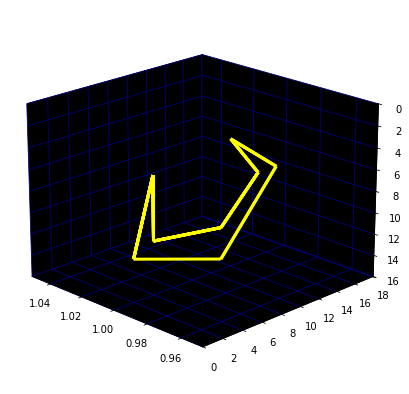

In [14]:
def gradualPlotObject(vertices):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.view_init(azim=135,elev=20,vertical_axis="y")
    ax.yaxis.set_inverted(True) 
    ax.xaxis.set_inverted(True) 
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    plt.rcParams['grid.color'] = "navy"

    for i in range(1,len(vertices)):
        for (x,y,z),conns in vertices[:i]:
            for j,(conn,color) in enumerate(conns):
                x1,y1,z1 = vertices[conn-1][0]
                xs = np.array([[x,x1]])
                ys = np.array([[y,y1]])
                zs = np.array([[z,z1]])
                ax.plot_wireframe(xs,ys,zs,color=color,linewidth=3)
                ax.set_yticks(range(0,18,2))
                ax.set_xticks(range(0,20,2))
                plt.savefig(f"build_claws/build_claw_{i}_{j}.png", bbox_inches='tight')

d = claws
ls = [[int(x) for x in ','.join([x for x in p.split() if ',' in x]).split(',')]
     for p in d.split('\n\n')]
l = ls[2]
vertices = getVerticesAndConns(l,"yellow")
print(vertices)
gradualPlotObject(vertices)
